In [1]:
import gpxpy
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# This function takes a GPX file as an input, and extracts trackpoints into a pandas dataframe
#  Input: GPXfile - a string referencing a .gpx file exported from Strava, of ski tracking data
# Output: df - a pandas dataframe of trackpoints (time, latitude, longitute, elevation)

def GPXtoPandas(GPXfile):

    #Load the GPX file
    with open(GPXfile, "r") as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    # Extract trackpoints
    data = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                data.append({
                    "time": point.time,
                    "latitude": point.latitude,
                    "longitude": point.longitude,
                    "elevation": point.elevation,
                })
    
    # Convert to pandas DataFrame
    df = pd.DataFrame(data)
    df["time"] = pd.to_datetime(df["time"])
    df["elapsed_seconds"] = (df["time"] - df["time"].iloc[0]).dt.total_seconds()
    return(df)

In [43]:
shortTurnsdf = GPXtoPandas("Short_turns.gpx")
longTurnsdf = GPXtoPandas("Long_turns.gpx")

In [37]:
GPXtoPandas("Long_turns.gpx")

,time,latitude,longitude,elevation,elapsed_seconds
0,2025-04-08 22:38:17+00:00,50.068627,-122.945823,1832.3,0.0
1,2025-04-08 22:38:18+00:00,50.068628,-122.945822,1832.3,1.0
2,2025-04-08 22:38:19+00:00,50.068629,-122.945821,1832.3,2.0
3,2025-04-08 22:38:20+00:00,50.068630,-122.945820,1832.3,3.0
4,2025-04-08 22:38:21+00:00,50.068630,-122.945819,1832.3,4.0
...,...,...,...,...,...
112,2025-04-08 22:40:10+00:00,50.074343,-122.943307,1674.5,113.0
113,2025-04-08 22:40:11+00:00,50.074343,-122.943306,1674.5,114.0
114,2025-04-08 22:40:12+00:00,50.074341,-122.943305,1674.5,115.0
115,2025-04-08 22:40:13+00:00,50.074336,-122.943298,1674.5,116.0


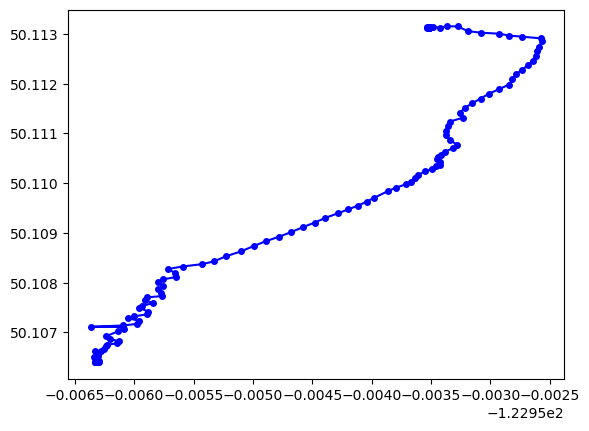

In [45]:
plt.plot(shortTurnsdf['longitude'], shortTurnsdf['latitude'], marker='o', linestyle='-', color='b', markersize=4)

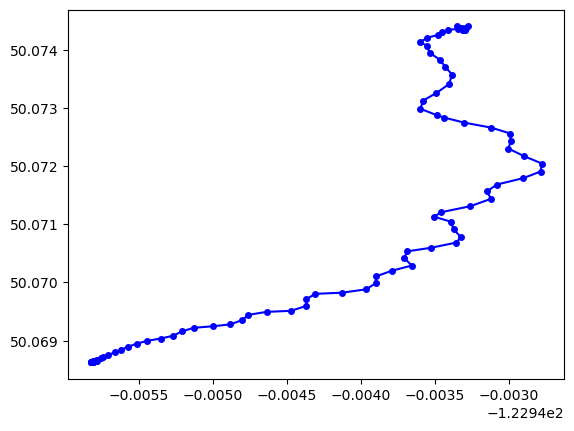

In [47]:
plt.plot(longTurnsdf['longitude'], longTurnsdf['latitude'], marker='o', linestyle='-', color='b', markersize=4)